# Text Classification Using Naive Bayes

## Importing the Libraries

In [1]:
# Importing all the neccessary libraries required in the project

import os                                              # For opening the files with various directories
import pandas as pd                                    # For creating the dataframe
import numpy as np                                     # For various operations of n-d arrays
import matplotlib.pyplot as plt                        # For plotting the graphs
from sklearn.model_selection import train_test_split   # For splitting the dataset into train and test
from sklearn.metrics import confusion_matrix           # For creating confusion matrix 
from sklearn.metrics import classification_report      # For creating report for the classification algo
from sklearn.naive_bayes import MultinomialNB          # Inbuilt Multinomial Naive Bayes Classifier

## Opening the All Documents and Creating a Dataset

### Reading all the Documents and Saving the Data with its Category

In [2]:
base_dir = './20_newsgroups'             # Base Directory where the documents of text is saved
categories = os.listdir(base_dir)        # All the categories for the text classification
original_data = []                       # Saving all the data from the files
result = []                              # Saving category of each file
for category in categories:              # Reading each file, saving the data and its category
    """
        Traversing through each folder in the newsgroup,
        reading all the files in it and saving the data and its
        category in the list
    """
    new_folder_dir = f'{base_dir}/{category}'
    files = os.listdir(new_folder_dir)
    for file in files:
        new_file_path = f'{new_folder_dir}/{file}'
        try:
            with open(new_file_path,'rb') as bfile:
                bdata = bfile.read().decode('utf-8')
                original_data.append(bdata)
                result.append(category)
        except Exception as e:
            pass
print(len(original_data))

19924


### Cleaning the Data (Removing Unneccessary Words from the Dataset)

#### Collecting Stopwords from the English Dictionary

In [3]:
# All the stopwords in the English Dictionary
stopwords = ["a","able","about","above","abst","accordance","according","accordingly","across","act",
"added","adj","affected","affecting","affects","after","afterwards","again","against",
"all","almost","alone","along","already","also","although","always","am",
"amongst","an","and","announce","another","any","anybody","anyhow","anymore",
"anything","anyway","anyways","anywhere","apparently","approximately","are","aren","arent",
"around","as","aside","ask","asking","at","auth","available","away",
"b","back","be","became","because","become","becomes","becoming","been",
"beforehand","begin","beginning","beginnings","begins","behind","being","believe","below",
"besides","between","beyond","biol","both","brief","briefly","but","by",
"ca","came","can","cannot","can't","cause","causes","certain","certainly",
"com","come","comes","contain","containing","contains","could","couldnt","d",
"did","didn't","different","do","does","doesn't","doing","done","don't",
"downwards","due","during","e","each","ed","edu","effect","eg",
"eighty","either","else","elsewhere","end","ending","enough","especially","et",
"etc","even","ever","every","everybody","everyone","everything","everywhere","ex",
"f","far","few","ff","fifth","first","five","fix","followed",
"follows","for","former","formerly","forth","found","four","from","further",
"g","gave","get","gets","getting","give","given","gives","giving",
"goes","gone","got","gotten","h","had","happens","hardly","has",
"have","haven't","having","he","hed","hence","her","here","hereafter",
"herein","heres","hereupon","hers","herself","hes","hi","hid","him",
"his","hither","home","how","howbeit","however","hundred","i","id",
"if","i'll","im","immediate","immediately","importance","important","in","inc",
"index","information","instead","into","invention","inward","is","isn't","it",
"it'll","its","itself","i've","j","just","k","keepkeeps","kept",
"km","know","known","knows","l","largely","last","lately","later",
"latterly","least","less","lest","let","lets","like","liked","likely",
"little","ll","look","looking","looks","ltd","m","made","mainly",
"makes","many","may","maybe","me","mean","means","meantime","meanwhile",
"mg","might","million","miss","ml","more","moreover","most","mostly",
"mrs","much","mug","must","my","myself","n","na","name",
"nay","nd","near","nearly","necessarily","necessary","need","needs","neither",
"nevertheless","new","next","nine","ninety","no","nobody","non","none",
"noone","nor","normally","nos","not","noted","nothing","now","nowhere",
"obtain","obtained","obviously","of","off","often","oh","ok","okay",
"omitted","on","once","one","ones","only","onto","or","ord",
"others","otherwise","ought","our","ours","ourselves","out","outside","over",
"owing","own","p","page","pages","part","particular","particularly","past",
"perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp",
"present","previously","primarily","probably","promptly","proud","provides","put","q",
"quickly","quite","qv","r","ran","rather","rd","re","readily",
"recent","recently","ref","refs","regarding","regardless","regards","related","relatively",
"respectively","resulted","resulting","results","right","run","s","said","same",
"say","saying","says","sec","section","see","seeing","seem","seemed",
"seems","seen","self","selves","sent","seven","several","shall","she",
"she'll","shes","should","shouldn't","show","showed","shown","showns","shows",
"significantly","similar","similarly","since","six","slightly","so","some","somebody",
"someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry",
"specified","specify","specifying","still","stop","strongly","sub","substantially","successfully",
"sufficiently","suggest","sup","suret","take","taken","taking","tell","tends",
"than","thank","thanks","thanx","that","that'll","thats","that've","the",
"theirs","them","themselves","then","thence","there","thereafter","thereby","thered",
"therein","there'll","thereof","therere","theres","thereto","thereupon","there've","these",
"theyd","they'll","theyre","they've","think","this","those","thou","though",
"thousand","throug","through","throughout","thru","thus","til","tip","to",
"too","took","toward","towards","tried","tries","truly","try","trying",
"twice","two","u","un","under","unfortunately","unless","unlike","unlikely",
"unto","up","upon","ups","us","use","used","useful","usefully",
"uses","using","usually","v","value","various","ve","very","via",
"vol","vols","vs","w","want","wants","was","wasnt","way",
"wed","welcome","we'll","went","were","werent","we've","what","whatever",
"whats","when","whence","whenever","where","whereafter","whereas","whereby","wherein",
"whereupon","wherever","whether","which","while","whim","whither","who","whod",
"whole","who'll","whom","whomever","whos","whose","why","widely","willing",
"with","within","without","wont","words","world","would","wouldnt","www",
"y","yes","yet","you","youd","you'll","your","youre","yours",
"yourselves","you've","z","zero"]

#### Cleaning the Dataset by removing stopping words and punctuation from the dictionary

In [4]:
cleaned_dataset = []        # Saving all the cleaned data into the list
for data in original_data:
    # Removing unneccessary punctuation from the data
    data = data.replace('\n', ' ')
    data = data.replace(',',' ')
    data = data.replace('.',' ')
    data = data.replace('[','')
    data = data.replace(']','')
    data = data.replace('(','')
    data = data.replace(')','')
    data = data.replace('-','')
    data = data.replace('<','')
    data = data.replace('>','')
    data = data.replace('*','')
    data = data.replace('=','')
    data = data.replace('/','')
    data = data.replace('"','')
    data = data.replace('/','')
    data = data.replace('\\','')
    data = data.replace('!','')
    data = data.replace('#','')
    data = data.replace('|','')
    data = data.replace(':','')
    data = data.replace("'",'')
    data = data.replace(';','')
    data = data.replace('$','')
    data = data.replace('}','')
    data = data.replace('{','')
    data = data.replace('_','')
    data = data.replace('-','')
    data = data.replace('@','')
    words = data.strip().split()
    cleaned_word = []
    for word in words:
        if len(word) > 2 and word not in stopwords:
            cleaned_word.append(word)
    cleaned_dataset.append(np.array(cleaned_word, dtype = str))

In [5]:
cleaned_dataset = np.array(cleaned_dataset, dtype = object)
result = np.array(result)

### Splitting the Dataset into the Training Set and Test Set

In [6]:
# Since we have cleaned our data, we can split the data into training and test set, so we can create feature data
X_train, X_test, Y_train, Y_test = train_test_split(cleaned_dataset, result, test_size = 0.25, random_state = 0)

### Creating the Feature Set

#### Creating a dictionary which contains the count of each word in the training set

In [7]:
word_count_dict = {}
for words in X_train:
    for word in words:
        word_count_dict[word] = word_count_dict.get(word,0)+1
word_count_dict

{'Path': 14989,
 'cantaloupe': 19452,
 'srv': 24090,
 'cmu': 39000,
 'edumagnesium': 3247,
 'club': 3379,
 'edunews': 5635,
 'sei': 4563,
 'educis': 3507,
 'ohiostate': 11609,
 'eduzaphod': 3482,
 'mps': 6918,
 'eduhowland': 1297,
 'reston': 8186,
 'ans': 8308,
 'netagatezabriskie': 4,
 'berkeley': 908,
 'eduspp': 4,
 'From': 15989,
 'sppzabriskie': 10,
 'Steve': 1006,
 'Pope': 124,
 'Newsgroups': 15079,
 'sci': 6414,
 'med': 1022,
 'Subject': 15346,
 'Can': 926,
 'men': 791,
 'yeast': 115,
 'infections?': 12,
 'Date': 15154,
 'Apr': 15278,
 '1993': 12277,
 '071238': 1,
 'GMT': 13239,
 'Organization': 14481,
 'Berkeley': 316,
 'ERL': 13,
 'Lines': 15006,
 'Distribution': 3286,
 'MessageID': 15001,
 '1rimd6gi6agate': 3,
 'References': 9402,
 '1993Apr13': 265,
 '185252': 2,
 '10270samba': 2,
 'oit': 145,
 'unc': 379,
 'C5FsoG': 2,
 'HDwacsu': 2,
 'buffalo': 678,
 'badboyC64qIq': 2,
 'BA6netcom': 2,
 'NNTPPostingHost': 3199,
 'zion': 5,
 'woman': 240,
 'told': 919,
 'doctor': 236,
 'catch

#### Finding the cutoff frequency

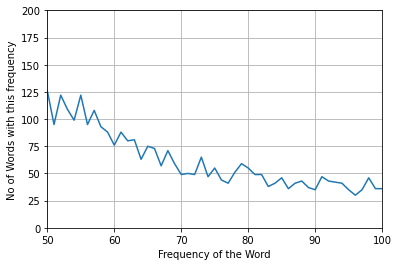

In [8]:
# Finding the total no of words for each frequency
num_words = [0 for index in range(max(word_count_dict.values())+1)]
freq = [index for index in range(max(word_count_dict.values())+1)]
for word in word_count_dict:
    num_words[word_count_dict[word]] += 1
    
# Plotting the graph to find cutoff frequency
plt.plot(freq,num_words)
plt.axis([50,100,0,200])
plt.xlabel('Frequency of the Word')
plt.ylabel('No of Words with this frequency')
plt.grid()
plt.show()

In [9]:
cutoff_frequency = 80
no_of_words_above_cutoff_freq = len(word_count_dict)-sum(num_words[:cutoff_frequency])
print(f'No of words above cutoff frequency - {cutoff_frequency} = {no_of_words_above_cutoff_freq}')

No of words above cutoff frequency - 80 = 4581


#### Creating feature set

In [10]:
feature_set = []
for word in word_count_dict:
    if word_count_dict[word] >= cutoff_frequency:
        feature_set.append(word)
print(feature_set)

['Path', 'cantaloupe', 'srv', 'cmu', 'edumagnesium', 'club', 'edunews', 'sei', 'educis', 'ohiostate', 'eduzaphod', 'mps', 'eduhowland', 'reston', 'ans', 'berkeley', 'From', 'Steve', 'Pope', 'Newsgroups', 'sci', 'med', 'Subject', 'Can', 'men', 'yeast', 'Date', 'Apr', '1993', 'GMT', 'Organization', 'Berkeley', 'Lines', 'Distribution', 'MessageID', 'References', '1993Apr13', 'oit', 'unc', 'buffalo', 'NNTPPostingHost', 'woman', 'told', 'doctor', 'catch', 'infection', 'causing', 'Probably', 'reason', 'talk', 'politics', 'mideast', 'edufs7', 'ece', 'edueuropa', 'eng', 'gtefsd', 'ctr', 'columbia', 'uka', 'switch', 'Jewish', 'Palestine', 'Sender', 'Administration', 'news', 'NntpPostingHost', 'University', 'France', 'rutgers', 'brown', 'yorku', 'bony', 'Tue', 'article', 'jakebony1', 'Jake', 'Livni', 'writes', 'According', '600', '000', 'Jews', 'Egypt', 'This', 'number', 'The', 'total', 'leaving', 'larger', 'arrived', 'Holy', 'thinking', 'guilty', 'Unfortunately', 'common', 'among', 'Arabs', 'Mi

### Converting the Training Set and Test Set into the Required Format 

In [11]:
# Converting the X_train
X_train_dataset = np.zeros((len(X_train),len(feature_set)))
for rowNo in range(len(X_train)):
    for word in X_train[rowNo]:
        if word in feature_set:
            X_train_dataset[rowNo][feature_set.index(word)] += 1
print(X_train_dataset)

[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 2. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]


In [12]:
# Converting the X_test
X_test_dataset = np.zeros((len(X_test),len(feature_set)))
for rowNo in range(len(X_test)):
    for word in X_test[rowNo]:
        if word in feature_set:
            X_test_dataset[rowNo][feature_set.index(word)] += 1
print(X_test_dataset)

[[1. 1. 2. ... 0. 0. 0.]
 [1. 1. 2. ... 0. 0. 0.]
 [1. 2. 2. ... 0. 0. 0.]
 ...
 [1. 1. 2. ... 0. 0. 0.]
 [1. 2. 2. ... 0. 0. 0.]
 [1. 1. 2. ... 0. 0. 0.]]


## Testing the Training Set and Test Set on the Inbuilt Naive Bayes Algorithm

In [13]:
clf = MultinomialNB()                                      # Object for Multinomial Naive Bayes Classifier
clf.fit(X_train_dataset, Y_train)                          # Training the classifier with the help of training set
Y_train_predict = clf.predict(X_train_dataset)             # Predicting the values for the training set
Y_test_predict = clf.predict(X_test_dataset)               # Predicting the values for the test set
sklearn_train_score = clf.score(X_train_dataset, Y_train)  # Finding the score for the training set 
sklearn_test_score = clf.score(X_test_dataset, Y_test)     # Finding the score for the test set
# Classification Report for Training Set and Test Set
train_classification_report = classification_report(Y_train, Y_train_predict)
test_classification_report = classification_report(Y_test, Y_test_predict)

In [14]:
print('Sklearn Training Score:', sklearn_train_score)
print('Sklearn Test Score:', sklearn_test_score)

Sklearn Training Score: 0.9254500434986281
Sklearn Test Score: 0.8845613330656494


In [15]:
print('Classification Report for Training Set\n')
print(train_classification_report)

Classification Report for Training Set

                          precision    recall  f1-score   support

             alt.atheism       0.84      0.88      0.86       741
           comp.graphics       0.92      0.87      0.89       753
 comp.os.ms-windows.misc       0.94      0.94      0.94       739
comp.sys.ibm.pc.hardware       0.87      0.93      0.90       749
   comp.sys.mac.hardware       0.93      0.96      0.94       755
          comp.windows.x       0.96      0.91      0.93       737
            misc.forsale       0.88      0.96      0.92       762
               rec.autos       0.95      0.96      0.95       757
         rec.motorcycles       0.96      0.98      0.97       756
      rec.sport.baseball       0.99      0.98      0.98       726
        rec.sport.hockey       0.99      0.98      0.98       761
               sci.crypt       0.99      0.97      0.98       729
         sci.electronics       0.91      0.95      0.93       741
                 sci.med       0.99

In [16]:
print('Classification Report for Test Set\n')
print(test_classification_report)

Classification Report for Test Set

                          precision    recall  f1-score   support

             alt.atheism       0.75      0.83      0.79       252
           comp.graphics       0.85      0.79      0.82       242
 comp.os.ms-windows.misc       0.88      0.88      0.88       261
comp.sys.ibm.pc.hardware       0.77      0.85      0.81       246
   comp.sys.mac.hardware       0.84      0.93      0.88       230
          comp.windows.x       0.94      0.85      0.89       259
            misc.forsale       0.88      0.96      0.92       234
               rec.autos       0.92      0.92      0.92       239
         rec.motorcycles       0.93      0.95      0.94       244
      rec.sport.baseball       0.98      0.97      0.98       267
        rec.sport.hockey       0.97      0.98      0.97       233
               sci.crypt       0.98      0.94      0.96       270
         sci.electronics       0.87      0.91      0.89       253
                 sci.med       0.99    

## Building Own Naive Baiyes Algorithm

In [17]:
# Building the Algorithm
class NaiveBayesAlgo:
    def __init__(self):                       # Initialising the constructor
        self.__count_dict = {}                # To keep count of each word in the feature set for each class
        self.__allClasses = []                # All the unique classes
        self.__noOfRows = None
        self.__noOfFeatures = None
        
    def fit(self,X_train,Y_train):            # Defining the fit function to train the algorithm
        self.__allClasses = np.unique(Y_train)
        self.__noOfRows = X_train.shape[0]
        self.__noOfFeatures = X_train.shape[1]
        for cl in self.__allClasses:
            self.__count_dict[cl] = {}
            self.__count_dict[cl]['SelfCount'] = np.sum([Y_train == cl])   # Keeping the count of current class
            rowsHavingCurrentClass = X_train[Y_train == cl]      # All the rows in X_train which has current class
            totalWords = 0                                       # Total no of Words in the current class
            for index in range(self.__noOfFeatures):
                # Count for all the specific word for the class
                self.__count_dict[cl][index] = np.sum(rowsHavingCurrentClass[:,index])  
                totalWords += np.sum(rowsHavingCurrentClass[:,index])
            self.__count_dict[cl]['TotalWords'] = totalWords     # Count of the total words for the class
    
    def predict(self,X_test):                 # Defining the predict function to predict the values
        predict_values = []                   # List for predicted values
        for row in X_test:
            predicted_class = self.__predict_single(row)     # Predicting one row at a time
            predict_values.append(predicted_class)           # Saving the prediction
        return np.array(predict_values)                      # Returning all the prediction
    
    def score(self,X_pred,Y_test):                      # Score of the prediction
        correct_values = np.sum([Y_test == X_pred])     # All the values which are correct
        total_values = len(Y_test)
        return correct_values/total_values                   # Returning the Score
    
    def __predict_single(self,row):           # Prediction function for a single row
        max_prob = -2**31
        max_class = None
        for cl in self.__allClasses:
            prob_val = self.__predict_prob(row,cl) # Finding the probability how much row belongs to class cl
            # If it is greater to current_max, we will change the class
            if max_class is None or max_prob < prob_val: 
                max_prob = prob_val
                max_class = cl
        return max_class                      # Return the class
    
    def __predict_prob(self,row,cl):          # Finding the probability of row belongs to class
        prob = np.log(self.__count_dict[cl]['SelfCount']) - np.log(self.__noOfRows)                              
        for index in range(self.__noOfFeatures):
            value = row[index]*(np.log(self.__count_dict[cl][index]+1)-
                                np.log(self.__count_dict[cl]['TotalWords']+self.__noOfFeatures))
            prob += value
        return prob                           # Returning Probability

In [18]:
algo = NaiveBayesAlgo()
algo.fit(X_train_dataset,Y_train)

In [19]:
self_Y_train_pred = algo.predict(X_train_dataset)
self_Y_test_pred = algo.predict(X_test_dataset)
self_training_score = algo.score(self_Y_train_pred,Y_train)
self_test_score = algo.score(self_Y_test_pred,Y_test)

In [20]:
print('Self Training Score:', self_training_score)
print('Self Test Score:', self_test_score)

Self Training Score: 0.9254500434986281
Self Test Score: 0.8845613330656494


In [21]:
print('Classification Report for Training Set\n')
print(classification_report(self_Y_train_pred, Y_train))

Classification Report for Training Set

                          precision    recall  f1-score   support

             alt.atheism       0.88      0.84      0.86       783
           comp.graphics       0.87      0.92      0.89       717
 comp.os.ms-windows.misc       0.94      0.94      0.94       745
comp.sys.ibm.pc.hardware       0.93      0.87      0.90       800
   comp.sys.mac.hardware       0.96      0.93      0.94       781
          comp.windows.x       0.91      0.96      0.93       702
            misc.forsale       0.96      0.88      0.92       832
               rec.autos       0.96      0.95      0.95       767
         rec.motorcycles       0.98      0.96      0.97       765
      rec.sport.baseball       0.98      0.99      0.98       716
        rec.sport.hockey       0.98      0.99      0.98       751
               sci.crypt       0.97      0.99      0.98       716
         sci.electronics       0.95      0.91      0.93       775
                 sci.med       0.94

In [22]:
print('Classification Report for Test Set\n')
print(classification_report(self_Y_test_pred, Y_test))

Classification Report for Test Set

                          precision    recall  f1-score   support

             alt.atheism       0.83      0.75      0.79       278
           comp.graphics       0.79      0.85      0.82       224
 comp.os.ms-windows.misc       0.88      0.88      0.88       260
comp.sys.ibm.pc.hardware       0.85      0.77      0.81       272
   comp.sys.mac.hardware       0.93      0.84      0.88       256
          comp.windows.x       0.85      0.94      0.89       233
            misc.forsale       0.96      0.88      0.92       256
               rec.autos       0.92      0.92      0.92       241
         rec.motorcycles       0.95      0.93      0.94       251
      rec.sport.baseball       0.97      0.98      0.98       263
        rec.sport.hockey       0.98      0.97      0.97       235
               sci.crypt       0.94      0.98      0.96       259
         sci.electronics       0.91      0.87      0.89       264
                 sci.med       0.88    